# Investment Data Analysis Assignment

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

### Checkpoint 1: Data Cleaning 1

#### How many unique companies are present in rounds2?

In [11]:
import chardet

In [12]:
with open('rounds2.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [13]:
#Loading rounds2 data
rounds2 = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns',rounds2.shape[1]+1)

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [14]:
rounds2.shape

(114949, 6)

In [15]:
#Checking unique companies are present in rounds2?

print(rounds2['company_permalink'].value_counts().count())
print(len(rounds2['company_permalink'].unique()))

90247
90247


In [16]:
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.title())
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/Organization/-Qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/Organization/-The-One-Of-Them-Inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [17]:
#How many unique companies are present in rounds2?
print(len(rounds2['company_permalink'].unique()))

66370


In [18]:
#Renaming column to match company column
rounds2 = rounds2.rename(columns = {'company_permalink':'permalink'})
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/Organization/-Qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/Organization/-The-One-Of-Them-Inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### How many unique companies are present in companies?

In [19]:
#Loading companies data
companies = pd.read_csv('companies.csv')
companies.head()

,permalink,name,homepage_url,...,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,...,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,...,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,...,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,...,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,...,"Springfield, Illinois",Champaign,01-01-2010


In [20]:
companies.shape

(66368, 10)

In [21]:
# How many unique companies are present in companies?

len(companies['permalink'].unique())

66368

In [22]:
#checking whether name is unique or not
len(companies['name'].unique())

66100

In [23]:
companies['name'].value_counts()

Karma                    4
Spire                    4
Peach                    4
Blink                    4
Roost                    4
                        ..
Kxter.com                1
Aquarium Life Customs    1
Outline App              1
Endurance Wind Power     1
LLamasoft                1
Name: name, Length: 66099, dtype: int64

In [24]:
#checking if permalink has nulls
companies['permalink'].isnull().sum()

0

In [25]:
len(companies['permalink'].unique())

66368

#### Merging Data frames

In [26]:
#Merging
master_frame = pd.merge(rounds2, companies, how='inner', on='permalink')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,...,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,...,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,...,DE - Other,Delaware City,04-09-2014
2,/Organization/-Qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,...,DE - Other,Delaware City,04-09-2014
3,/Organization/-The-One-Of-Them-Inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,...,NaN,NaN,NaN
4,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,...,Beijing,Beijing,01-01-2007


In [27]:
master_frame.duplicated().value_counts()

False    114875
dtype: int64

#### How many observations are present in master_frame?

In [28]:
master_frame.shape

(114875, 15)

#### Data cleaning

In [29]:
#Find missing vlaues
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83743
funded_at                      0
raised_amount_usd          19960
name                           1
homepage_url                6126
category_list               3387
status                         0
country_code                8637
state_code                 10903
region                     10126
city                       10123
founded_at                 20488
dtype: int64

In [30]:
# Checking missing value percentage

round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.90
funded_at                   0.00
raised_amount_usd          17.38
name                        0.00
homepage_url                5.33
category_list               2.95
status                      0.00
country_code                7.52
state_code                  9.49
region                      8.81
city                        8.81
founded_at                 17.84
dtype: float64

In [31]:
# "funding_round_code" has 50% of missing values ,I dont see any importance for this analysis , droping that too
master_frame = master_frame.drop('funding_round_code', axis=1)

# droping NAN values from 'raised_amount_usd' column since its target column
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]


round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                4.56
category_list               1.09
status                      0.00
country_code                6.14
state_code                  7.99
region                      7.40
city                        7.40
founded_at                 16.80
dtype: float64

In [32]:
# droping companies which are closed
master_frame = master_frame[master_frame['status'] != 'closed']

round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                4.31
category_list               0.72
status                      0.00
country_code                5.25
state_code                  7.09
region                      6.49
city                        6.49
founded_at                 15.81
dtype: float64

In [33]:
#droping companies where 'homepage_url'is missing, since its investment , I think its risky without checking thier page
master_frame = master_frame[master_frame['homepage_url'].notnull()]

round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                0.00
category_list               0.56
status                      0.00
country_code                4.69
state_code                  6.52
region                      5.92
city                        5.92
founded_at                 14.56
dtype: float64

In [34]:
# droping NAN values from 'country_code' column since its one of our main column
master_frame = master_frame[master_frame['country_code'].notnull()]

round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                0.00
category_list               0.44
status                      0.00
country_code                0.00
state_code                  1.92
region                      1.29
city                        1.29
founded_at                 13.82
dtype: float64

In [35]:
# droping NAN values from 'category_list' column since its one of our main column
# master_frame = master_frame[master_frame['category_list'].notnull()]
# master_frame.isnull().sum()

In [36]:
master_frame['category_list'].notnull().value_counts()

True     79794
False      350
Name: category_list, dtype: int64

In [37]:
#Checking mode value
master_frame['category_list'].mode()[0]

'Biotechnology'

In [38]:
# Imputing mode value to category_list

master_frame['category_list'] = master_frame['category_list'].fillna(master_frame['category_list'].mode()[0])
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,...,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,...,Mumbai,Mumbai,NaN
2,/Organization/-Qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,...,DE - Other,Delaware City,04-09-2014
4,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,...,Beijing,Beijing,01-01-2007
6,/Organization/01Games-Technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,...,Hong Kong,Hong Kong,NaN
7,/Organization/0Ndine-Biomedical-Inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,...,Vancouver,Vancouver,01-01-1997


In [39]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
name                        0.00
homepage_url                0.00
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.92
region                      1.29
city                        1.29
founded_at                 13.82
dtype: float64

In [40]:
# We will ingnore if missing value in 'state_code, region,city, founded_at' columns 
#since impact of these datas are very less for this analysis.
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
name                           0
homepage_url                   0
category_list                  0
status                         0
country_code                   0
state_code                  1542
region                      1035
city                        1032
founded_at                 11078
dtype: int64

In [41]:
master_frame.shape

(80144, 14)

In [42]:
#check if types are good
master_frame.dtypes

permalink                   object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
dtype: object

### Checkpoint 2: Funding Type Analysis

In [43]:
#lets drop the rows where 'raised_amount_usd' value less than 0
master_frame = master_frame[master_frame['raised_amount_usd'] >= 0]
master_frame.shape

(80144, 14)

In [44]:
# reset index
master_frame.reset_index(inplace=True, drop=True)
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,...,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,...,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,...,DE - Other,Delaware City,04-09-2014
2,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,...,Beijing,Beijing,01-01-2007
3,/Organization/01Games-Technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,...,Hong Kong,Hong Kong,NaN
4,/Organization/0Ndine-Biomedical-Inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,...,Vancouver,Vancouver,01-01-1997


In [45]:
# we will be keeping fund amount between from 5m to 15m, since Spark funds is interested in that range
master_frame = master_frame.loc[((master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)),:]
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,...,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,...,Mumbai,Mumbai,NaN
9,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,SF Bay Area,Mountain View,01-01-2011
14,/Organization/1-800-Publicrelations-Inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,...,New York City,New York,24-10-2013
15,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,SF Bay Area,Cupertino,01-03-2012
34,/Organization/1001-Menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,...,Paris,Paris,20-11-2010


In [46]:
#Spark fund is interested in 'seed','angel','venture','private_equity' fund types.
# so we keep only those fund types

fund_type = [ 'seed','angel','venture','private_equity']
master_frame = master_frame.loc[master_frame['funding_round_type'].isin(fund_type), :]
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,...,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,...,Mumbai,Mumbai,NaN
9,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,SF Bay Area,Mountain View,01-01-2011
14,/Organization/1-800-Publicrelations-Inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,...,New York City,New York,24-10-2013
15,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,SF Bay Area,Cupertino,01-03-2012
34,/Organization/1001-Menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,...,Paris,Paris,20-11-2010


#### Ploting total investment count in each funding type

In [47]:
# Check Total investment count in each funding type
master_frame['funding_round_type'].value_counts()

venture           14203
private_equity      360
seed                181
angel                59
Name: funding_round_type, dtype: int64

#### Ploting total investment count in each funding type

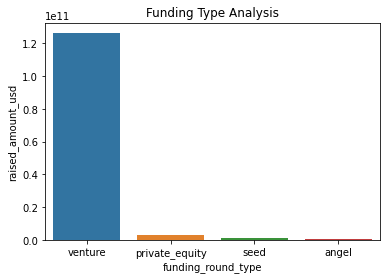

In [48]:
#Ploting total investment amount in each funding type

p1 = master_frame.pivot_table(values = 'raised_amount_usd', 
                              index='funding_round_type', 
                              aggfunc = 'sum').sort_values(by='raised_amount_usd', ascending=False)
p1.reset_index(level=0, inplace=True)

title ='Funding Type Analysis'
# figure(figsize=(13, 8), dpi=80)
sns.barplot(data=p1, x="funding_round_type", y="raised_amount_usd")
plt.title(title)
plt.show()


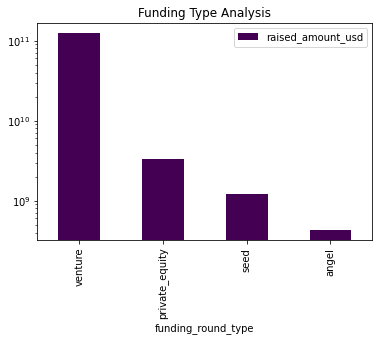

In [49]:
#Ploting total investment amount in each funding type in log scale to see difference clearly

cmap = cm.get_cmap('viridis') 
p1.plot(x='funding_round_type', y='raised_amount_usd', kind='bar',logy=True, colormap=cmap)#figsize=(15,8)
plt.title(title)
plt.show()

#### Representative funding amount of venture type

In [50]:
venture = master_frame.loc[(master_frame['funding_round_type']=='venture'),
                 ['funding_round_type','raised_amount_usd']]


In [51]:
#Representative funding amount of venture type
np.median(venture['raised_amount_usd'])


8300000.0

In [52]:
venture = master_frame.loc[(master_frame['funding_round_type']=='venture'),
                 ['funding_round_type','raised_amount_usd']].value_counts().head(3)
venture

funding_round_type  raised_amount_usd
venture             10000000.0           1571
                    5000000.0            1451
                    15000000.0            952
dtype: int64

#### Representative funding amount of seed type

In [53]:
seed = master_frame.loc[(master_frame['funding_round_type']=='seed'),
                 ['funding_round_type','raised_amount_usd']]

np.median(seed['raised_amount_usd'])

6000000.0

In [54]:
seed = master_frame.loc[(master_frame['funding_round_type']=='seed'),
                 ['funding_round_type','raised_amount_usd']].value_counts().head(3)
seed

funding_round_type  raised_amount_usd
seed                5000000.0            49
                    6000000.0            16
                    8000000.0             8
dtype: int64

#### Representative funding amount of angel type

In [55]:
angel = master_frame.loc[(master_frame['funding_round_type']=='angel'),
                 ['funding_round_type','raised_amount_usd']]

np.median(angel['raised_amount_usd'])

6400000.0

In [56]:
angel = master_frame.loc[(master_frame['funding_round_type']=='angel'),
                 ['funding_round_type','raised_amount_usd']].value_counts().head(3)
angel

funding_round_type  raised_amount_usd
angel               5000000.0            15
                    10000000.0            9
                    7000000.0             3
dtype: int64

#### Representative funding amount of  private equity type

In [57]:
private_equity = master_frame.loc[(master_frame['funding_round_type']=='private_equity'),
                 ['funding_round_type','raised_amount_usd']]

np.median(private_equity['raised_amount_usd'])

9256528.5

In [58]:
private_equity = master_frame.loc[(master_frame['funding_round_type']=='private_equity'),
                 ['funding_round_type','raised_amount_usd']].value_counts().head(3)
private_equity

funding_round_type  raised_amount_usd
private_equity      10000000.0           32
                    5000000.0            31
                    15000000.0           24
dtype: int64

####  Ploting the representative number of investments in the each funding type

In [59]:
rep_amount_in_FT = pd.concat([venture, seed, angel, private_equity], axis = 0)
rep_amount_in_FT

funding_round_type  raised_amount_usd
venture             10000000.0           1571
                    5000000.0            1451
                    15000000.0            952
seed                5000000.0              49
                    6000000.0              16
                    8000000.0               8
angel               5000000.0              15
                    10000000.0              9
                    7000000.0               3
private_equity      10000000.0             32
                    5000000.0              31
                    15000000.0             24
dtype: int64

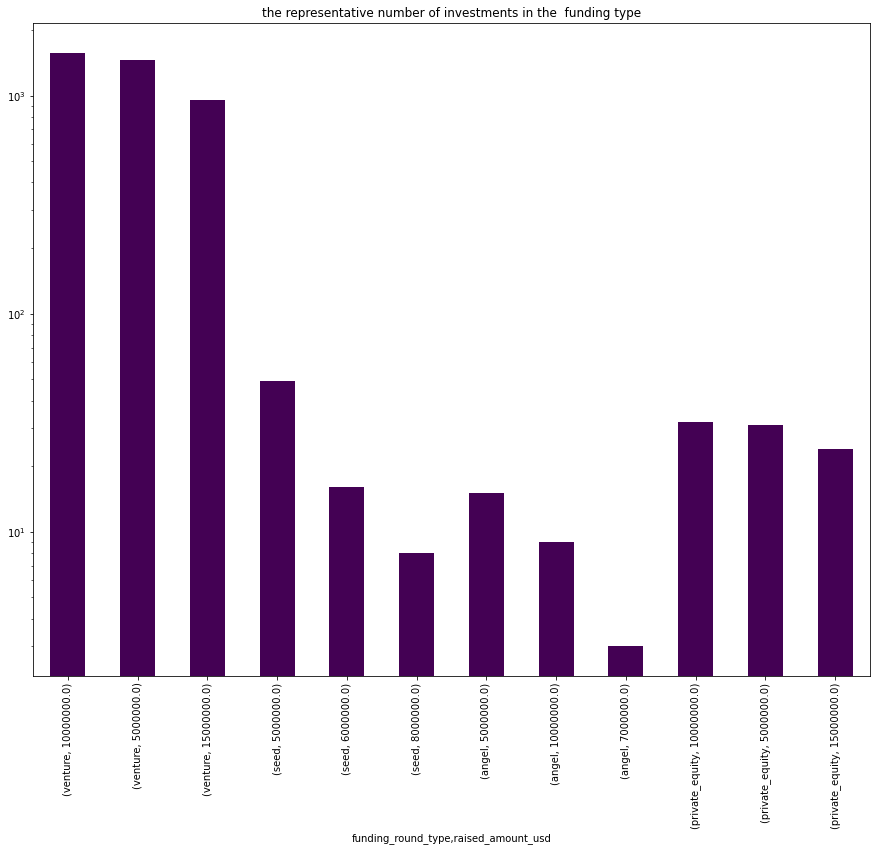

In [60]:
# Ploting the representative number of investments in the funding type

cmap = cm.get_cmap('viridis') 
ax = rep_amount_in_FT.plot.bar(figsize=(15, 12),logy=True , colormap =cmap)
title = 'the representative number of investments in the  funding type'
plt.title(title)
plt.show()

In [61]:
#We will be keeping only 'venture' funding type, since its highest investment type where most investment has happend.
master_frame = master_frame.loc[(master_frame['funding_round_type']=='venture'),:]
master_frame.reset_index(inplace=True, drop=True)
master_frame.head()


,permalink,funding_round_permalink,funding_round_type,...,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,...,Mumbai,Mumbai,NaN
1,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,SF Bay Area,Mountain View,01-01-2011
2,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,SF Bay Area,Cupertino,01-03-2012
3,/Organization/1001-Menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,...,Paris,Paris,20-11-2010
4,/Organization/1001Pharmacies-Com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,...,Montpellier,Montpellier,01-01-2012


### Checkpoint 3: Country Analysis

In [62]:
#filtering top nine countries which have received the highest total funding
country_table = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
country_table_sorted = country_table.sort_values(by='raised_amount_usd',ascending= False).head(9)
country_table_sorted.reset_index(level=0, inplace=True)
country_table_sorted

,country_code,raised_amount_usd
0,USA,9.676998e+10
1,GBR,4.836149e+09
2,CHN,4.614445e+09
3,CAN,3.191533e+09
4,IND,2.818674e+09
5,ISR,2.595270e+09
6,FRA,1.902911e+09
7,DEU,1.632179e+09
8,SGP,6.310370e+08


In [63]:
#Creating top9 dataframe using 'country_table_sorted' data frame, here we have only top nine countries investment details.
top9 = master_frame[master_frame['country_code'].isin(list(country_table_sorted.country_code))]
top9.head()

,permalink,funding_round_permalink,funding_round_type,...,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,...,Mumbai,Mumbai,NaN
1,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,SF Bay Area,Mountain View,01-01-2011
2,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,SF Bay Area,Cupertino,01-03-2012
3,/Organization/1001-Menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,...,Paris,Paris,20-11-2010
4,/Organization/1001Pharmacies-Com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,...,Montpellier,Montpellier,01-01-2012


In [64]:
top9.shape

(13330, 14)

In [65]:
# dictory for country where primery language is english
# 1 for yes, 0 for no
country_dict = {'USA':1, 'GBR':1, 'CHN':0, 'CAN':1, 'IND':0, 'ISR':0, 'FRA':0, 'DEU':0, 'SGP':1}

#Creating 'speaks_english'column where we get which country's primary language is english
top9['speaks_english']= top9['country_code'].apply(lambda x: country_dict[x])
top9.head()

,permalink,funding_round_permalink,funding_round_type,...,city,founded_at,speaks_english
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,...,Mumbai,NaN,0
1,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,Mountain View,01-01-2011,1
2,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,Cupertino,01-03-2012,1
3,/Organization/1001-Menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,...,Paris,20-11-2010,0
4,/Organization/1001Pharmacies-Com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,...,Montpellier,01-01-2012,0


#### Ploting the top 9 countries against the total amount of investments of funding type "Venture"

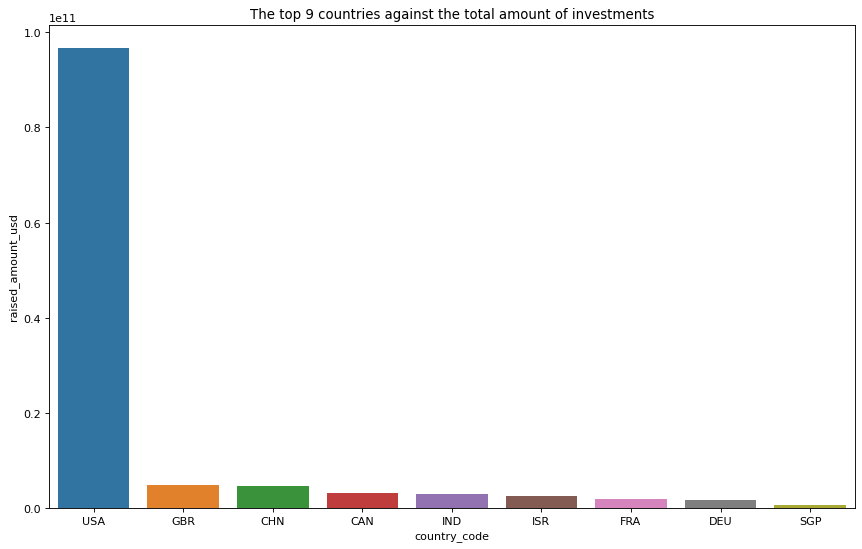

In [66]:
title ='The top 9 countries against the total amount of investments'
figure(figsize=(13, 8), dpi=80)
sns.barplot(data=country_table_sorted, x="country_code", y="raised_amount_usd")
plt.title(title)
plt.show()

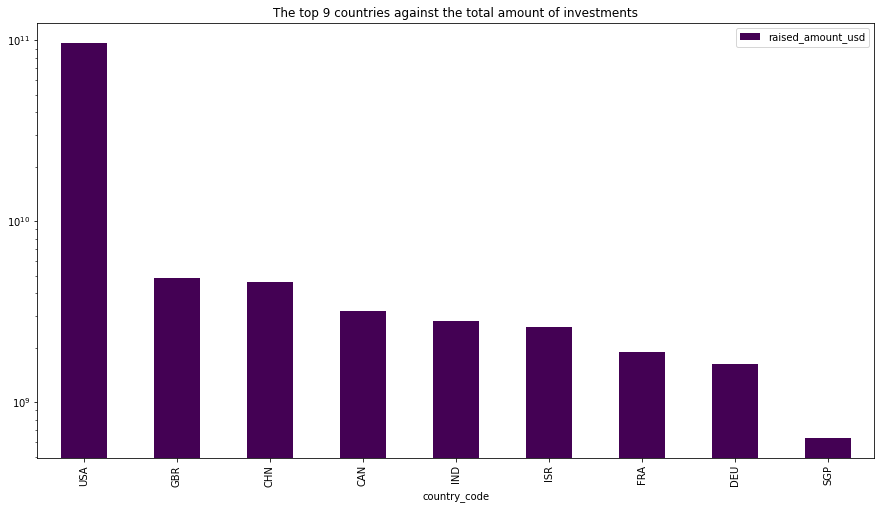

In [67]:
# Same plot with log scale to see the difference clearly
cmap = cm.get_cmap('viridis') 
country_table_sorted.plot(x='country_code', y='raised_amount_usd', kind='bar',logy=True, colormap=cmap, figsize=(15,8))
plt.title(title)
plt.show()

In [68]:
#droping rows where english is not primary language, since Spark fund want to invest in the countries english is primary language
top_eng_countries = top9[top9['speaks_english']==1]
top_eng_countries.shape

(11814, 15)

#### Top 3 English-Speaking Countries

In [69]:
# Top 3 English-Speaking Countries
top_eng_countries.pivot_table(values = 'raised_amount_usd', index = 'country_code', 
                              aggfunc = 'sum').sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
country_code,
USA,9.676998e+10
GBR,4.836149e+09
CAN,3.191533e+09
SGP,6.310370e+08


### Checkpoint 4: Sector Analysis 1

#### Extracting primary sector

In [70]:
# Extract the primary sector of each category list from the category_list column

top_eng_countries['primary_sector'] = top_eng_countries['category_list'].apply(lambda x : x.split('|')[0])
top_eng_countries.head()

,permalink,funding_round_permalink,funding_round_type,...,founded_at,speaks_english,primary_sector
1,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,01-01-2011,1,Analytics
2,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,01-03-2012,1,Apps
7,/Organization/128-Technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,...,07-07-2014,1,Service Providers
8,/Organization/1366-Technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,...,01-01-2007,1,Manufacturing
9,/Organization/1366-Technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,...,01-01-2007,1,Manufacturing


In [71]:
# Loading mapping data
mapping = pd.read_csv('mapping.csv', encoding = 'ISO-8859-1')
mapping.head()

,category_list,Automotive & Sports,Blanks,...,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,...,0,0,0
1,3D,0,0,...,0,0,0
2,3D Printing,0,0,...,0,0,0
3,3D Technology,0,0,...,0,0,0
4,Accounting,0,0,...,0,0,1


In [72]:
#Removing rows where entire rom has NAN values, and droping 'Blanks' column
mapping = mapping[mapping['Blanks']!=1]
mapping = mapping.drop('Blanks', axis=1)
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,...,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,...,0,0,0
2,3D Printing,0,0,...,0,0,0
3,3D Technology,0,0,...,0,0,0
4,Accounting,0,0,...,0,0,1
5,Active Lifestyle,0,0,...,0,0,0


In [73]:
#reseting index
top_eng_countries.reset_index(inplace=True, drop=True)

In [74]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [75]:
#Converting wide data frame to lond data frame
value_vars = list(mapping.columns[1:])

mapping_modified = pd.melt(mapping, id_vars=['category_list'], value_vars=value_vars)
mapping_modified.head()

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [76]:
# Filtering where value is 1
mapping_modified = mapping_modified[mapping_modified['value'] == 1]
mapping_modified.head()

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [77]:
# Renaming 

mapping_modified = mapping_modified.rename(columns={'variable':'main_sector'})
mapping_modified.head()

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [78]:
# Droping value column
mapping_modified = mapping_modified.drop('value', axis=1)
mapping_modified.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [79]:
# Merging top_eng_countries and mapping_modified data frames

top_eng_countries_merged = pd.merge(top_eng_countries, mapping_modified, how='left', left_on='primary_sector', right_on='category_list')
top_eng_countries_merged.head()

,permalink,funding_round_permalink,funding_round_type,...,primary_sector,category_list_y,main_sector
0,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,Analytics,NaN,NaN
1,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,Apps,Apps,"News, Search and Messaging"
2,/Organization/128-Technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,...,Service Providers,Service Providers,Others
3,/Organization/1366-Technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,...,Manufacturing,Manufacturing,Manufacturing
4,/Organization/1366-Technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,...,Manufacturing,Manufacturing,Manufacturing


In [80]:
# Removing duplicated columns
top_eng_countries_merged = top_eng_countries_merged.drop('category_list_y', axis=1)

# Renaming 
top_eng_countries_merged = top_eng_countries_merged.rename(columns={'category_list_x':'category_list'})
top_eng_countries_merged.head()

,permalink,funding_round_permalink,funding_round_type,...,speaks_english,primary_sector,main_sector
0,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,1,Analytics,NaN
1,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,1,Apps,"News, Search and Messaging"
2,/Organization/128-Technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,...,1,Service Providers,Others
3,/Organization/1366-Technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,...,1,Manufacturing,Manufacturing
4,/Organization/1366-Technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,...,1,Manufacturing,Manufacturing


#### Ploting the number of investments in the main sectors of the top 3 countries

In [81]:
#filtering investment country and sector wise
top_eng_countries_table = pd.pivot_table(data=top_eng_countries_merged, values="raised_amount_usd", 
                         index="country_code", columns="main_sector", 
                         aggfunc='count')

top_eng_countries_table

main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,...,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,
CAN,2,97,20,...,43,90,50
GBR,16,114,49,...,64,125,93
SGP,2,7,10,...,10,13,20
USA,146,2070,505,...,1403,2546,1777


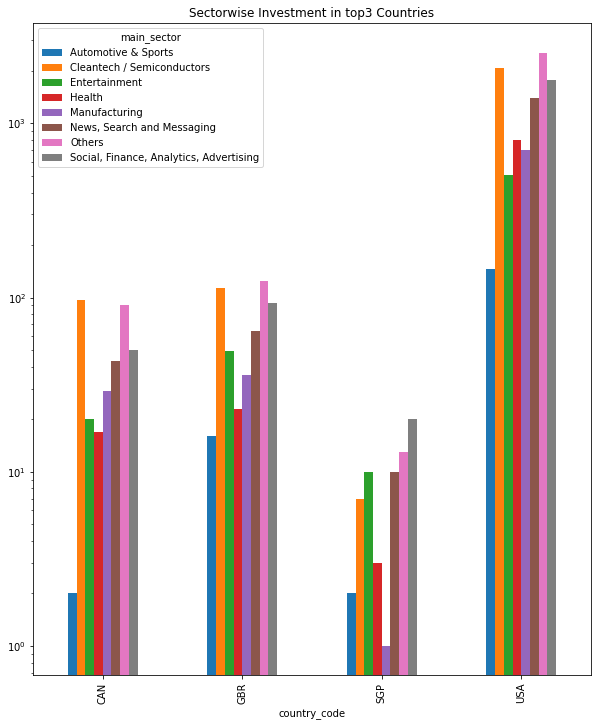

In [82]:
# Ploting the number of investments in the main sectors of the top 3 countries
ax = top_eng_countries_table.plot.bar(figsize=(10, 12),logy=True)
title = 'Sectorwise Investment in top3 Countries'
plt.title(title)
plt.show()

### Checkpoint 5: Sector Analysis 2

#### Creating D1,D2,D3 data frames country wise

#### Top investment country : USA

In [83]:
#Creating USA data frame 
d1 = top_eng_countries_merged[top_eng_countries_merged['country_code'] == 'USA']
d1.head()

,permalink,funding_round_permalink,funding_round_type,...,speaks_english,primary_sector,main_sector
0,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,...,1,Analytics,NaN
1,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,...,1,Apps,"News, Search and Messaging"
2,/Organization/128-Technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,...,1,Service Providers,Others
3,/Organization/1366-Technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,...,1,Manufacturing,Manufacturing
4,/Organization/1366-Technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,...,1,Manufacturing,Manufacturing


#### Total number of Investments in USA

In [84]:
d1['raised_amount_usd'].count()

10814

#### Total amount of Investments in USA

In [85]:
d1['raised_amount_usd'].sum()

96769980523.0

#### Total number of investment each main sectors in USA

In [86]:
d1_table = d1.pivot_table(values = 'raised_amount_usd', index='main_sector', aggfunc='count')
d1_table.sort_values(by='raised_amount_usd', ascending = False).head(3)

,raised_amount_usd
main_sector,
Others,2546
Cleantech / Semiconductors,2070
"Social, Finance, Analytics, Advertising",1777


#### Top main sectors and total amount of investments in top sector in USA 

In [87]:
d1_table = d1.pivot_table(values = 'raised_amount_usd', index='main_sector', aggfunc='sum')
d1_table = d1_table.sort_values(by='raised_amount_usd', ascending = False).head(3)
d1_table

,raised_amount_usd
main_sector,
Others,2.271053e+10
Cleantech / Semiconductors,1.908736e+10
"Social, Finance, Analytics, Advertising",1.557536e+10


In [88]:
d1_table.loc['Others','raised_amount_usd']

22710525066.0

In [89]:
#Creating dataframe where ' main sector' is Others
d1_others = d1[d1['main_sector'] == 'Others']
d1_others.head()

,permalink,funding_round_permalink,funding_round_type,...,speaks_english,primary_sector,main_sector
2,/Organization/128-Technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,...,1,Service Providers,Others
8,/Organization/170-Systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,...,1,Software,Others
9,/Organization/17Zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,...,1,Education,Others
10,/Organization/17Zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,...,1,Education,Others
11,/Organization/1Stdibs,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,...,1,E-Commerce,Others


#### which company received the highest and the second investment in top sector in USA?

In [90]:
d1_others = d1_others.pivot_table(values= 'raised_amount_usd', index='permalink', aggfunc='sum')
d1_others.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
permalink,
/Organization/Virtustream,64300000.0
/Organization/Capella,54968051.0
/Organization/Airtight-Networks,54201907.0


### Second top investment country : GBR

In [91]:
#Creating GBR data frame 
d2 = top_eng_countries_merged[top_eng_countries_merged['country_code'] == 'GBR']
d2.head()

,permalink,funding_round_permalink,funding_round_type,...,speaks_english,primary_sector,main_sector
28,/Organization/365Scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,...,1,Android,"Social, Finance, Analytics, Advertising"
70,/Organization/7Digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,...,1,Content Creators,Entertainment
71,/Organization/7Digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,...,1,Content Creators,Entertainment
75,/Organization/90Min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,...,1,Media,Entertainment
76,/Organization/90Min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,...,1,Media,Entertainment


#### Total number of Investments in GBR

In [92]:
d2['raised_amount_usd'].count()

558

#### Total amount of Investments in GBR

In [93]:
d2['raised_amount_usd'].sum()

4836148564.0

#### Total number of investment each main sectors in GBR

In [94]:
d2_table = d2.pivot_table(values = 'raised_amount_usd', index='main_sector', aggfunc='count')
d2_table.sort_values(by='raised_amount_usd', ascending = False).head(3)

,raised_amount_usd
main_sector,
Others,125
Cleantech / Semiconductors,114
"Social, Finance, Analytics, Advertising",93


#### Top main sectors and total amount of investments in top sector in GBR

In [95]:
d2_table = d2.pivot_table(values = 'raised_amount_usd', index='main_sector', aggfunc='sum')
d2_table = d2_table.sort_values(by='raised_amount_usd', ascending = False).head(3)
d2_table

,raised_amount_usd
main_sector,
Others,1.077641e+09
Cleantech / Semiconductors,1.026727e+09
"Social, Finance, Analytics, Advertising",7.811084e+08


In [96]:
#Creating dataframe where ' main sector' is Others
d2_others = d2[d2['main_sector'] == 'Others']
d2_others.head()

,permalink,funding_round_permalink,funding_round_type,...,speaks_english,primary_sector,main_sector
195,/Organization/Acs-Clothing,/funding-round/064999587157b0ceae7843204a105d6d,venture,...,1,E-Commerce,Others
196,/Organization/Acs-Clothing,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,...,1,E-Commerce,Others
363,/Organization/Aepona,/funding-round/57ca5d05989850fb1109b277cb6ae54e,venture,...,1,Web Hosting,Others
364,/Organization/Aepona,/funding-round/ad79a10f4c3f231375454da6393ec564,venture,...,1,Web Hosting,Others
570,/Organization/Almondy,/funding-round/d44f8bb9f1de72338d26e74607ea2c75,venture,...,1,Hospitality,Others


#### which company received the highest and the second investment in top sector in GBR?

In [97]:
d2_others = d2_others.pivot_table(values= 'raised_amount_usd', index='permalink', aggfunc='sum')
d2_others.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
permalink,
/Organization/Electric-Cloud,37000000.0
/Organization/Sensage,36250000.0
/Organization/Silverrail-Technologies,29000000.0


### Third top investment country : CAN

In [98]:
#Creating CAN data frame
d3 = top_eng_countries_merged[top_eng_countries_merged['country_code'] == 'CAN']
d3.head()

,permalink,funding_round_permalink,funding_round_type,...,speaks_english,primary_sector,main_sector
27,/Organization/360Incentives-Com,/funding-round/8712b14c58f7066491d136673931ed3e,venture,...,1,Software,Others
57,/Organization/500Px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,...,1,Apps,"News, Search and Messaging"
58,/Organization/500Px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,...,1,Apps,"News, Search and Messaging"
66,/Organization/6N-Silicon,/funding-round/82a8781150acd315eee75194fab51c21,venture,...,1,Concentrated Solar Power,Cleantech / Semiconductors
120,/Organization/Accedian-Networks,/funding-round/ba4bb0be650fa0dab04f23ec0b859e04,venture,...,1,Business Services,"Social, Finance, Analytics, Advertising"


#### Total number of Investments in CAN

In [99]:
d3['raised_amount_usd'].count()

374

#### Total amount of Investments in CAN

In [100]:
d3['raised_amount_usd'].sum()

3191532954.0

#### Total number of investment each main sectors in CAN

In [101]:
d3_table = d3.pivot_table(values = 'raised_amount_usd', index='main_sector', aggfunc='count')
d3_table.sort_values(by='raised_amount_usd', ascending = False).head(3)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,97
Others,90
"Social, Finance, Analytics, Advertising",50


#### Top main sectors and total amount of investments in top sector in CAN

In [102]:
d3_table = d3.pivot_table(values = 'raised_amount_usd', index='main_sector', aggfunc='sum')
d3_table = d3_table.sort_values(by='raised_amount_usd', ascending = False).head(3)
d3_table

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,881923144.0
Others,768490093.0
"Social, Finance, Analytics, Advertising",422343073.0


In [103]:
#Creating dataframe where ' main sector' is "Cleantech / Semiconductors" 
d3_others = d3[d3['main_sector'] == 'Cleantech / Semiconductors']
d3_others.head()

,permalink,funding_round_permalink,funding_round_type,...,speaks_english,primary_sector,main_sector
66,/Organization/6N-Silicon,/funding-round/82a8781150acd315eee75194fab51c21,venture,...,1,Concentrated Solar Power,Cleantech / Semiconductors
526,/Organization/Alethia-Biotherapeutics,/funding-round/b396150b6759b59d47ce65ed31e802d8,venture,...,1,Biotechnology,Cleantech / Semiconductors
567,/Organization/Allon-Therapeutics,/funding-round/65410bf4d48ff5c7e00703b7762fd7b9,venture,...,1,Biotechnology,Cleantech / Semiconductors
683,/Organization/Angiochem,/funding-round/de6628ea42bedcc84d405a02d10ba9cb,venture,...,1,Biotechnology,Cleantech / Semiconductors
846,/Organization/Aquinox-Pharmaceuticals,/funding-round/aab371c3f7e91aba4d04e9d314288869,venture,...,1,Biotechnology,Cleantech / Semiconductors


#### which company received the highest and the second investment in top sector in GBR?

In [104]:
d3_others = d3_others.pivot_table(values= 'raised_amount_usd', index='permalink', aggfunc='sum')
d3_others.sort_values(by='raised_amount_usd', ascending=False).head(3)

,raised_amount_usd
permalink,
/Organization/Fresco-Microchip,48000000.0
/Organization/Ostara,43152682.0
/Organization/Diablo-Technologies,35500000.0


#### Now we know top 3 sectors, so filtering as per top sectors

In [105]:
#Now we know top 3 sectors, so filtering as per top sectors
top_sectorwise = top_eng_countries_merged.loc[((top_eng_countries_merged['main_sector'] == 'Others') | 
        (top_eng_countries_merged['main_sector'] == 'Cleantech / Semiconductors')  |
        (top_eng_countries_merged['main_sector'] == 'Social, Finance, Analytics, Advertising')),:]

#reseting index
top_sectorwise.reset_index(inplace=True, drop=True)
top_sectorwise.head()

,permalink,funding_round_permalink,funding_round_type,...,speaks_english,primary_sector,main_sector
0,/Organization/128-Technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,...,1,Service Providers,Others
1,/Organization/170-Systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,...,1,Software,Others
2,/Organization/17Zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,...,1,Education,Others
3,/Organization/17Zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,...,1,Education,Others
4,/Organization/1Stdibs,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,...,1,E-Commerce,Others


In [106]:
# Creating table country and sectors wise.
top_sectorwise_table = pd.pivot_table(data=top_sectorwise, values="raised_amount_usd", 
                         index="country_code", columns="main_sector", 
                         aggfunc='count')
top_sectorwise_table

main_sector,Cleantech / Semiconductors,Others,"Social, Finance, Analytics, Advertising"
country_code,,,
CAN,97,90,50
GBR,114,125,93
SGP,7,13,20
USA,2070,2546,1777


#### Ploting the number of investments in the top 3 sectors of the top 3 countries on one chart 

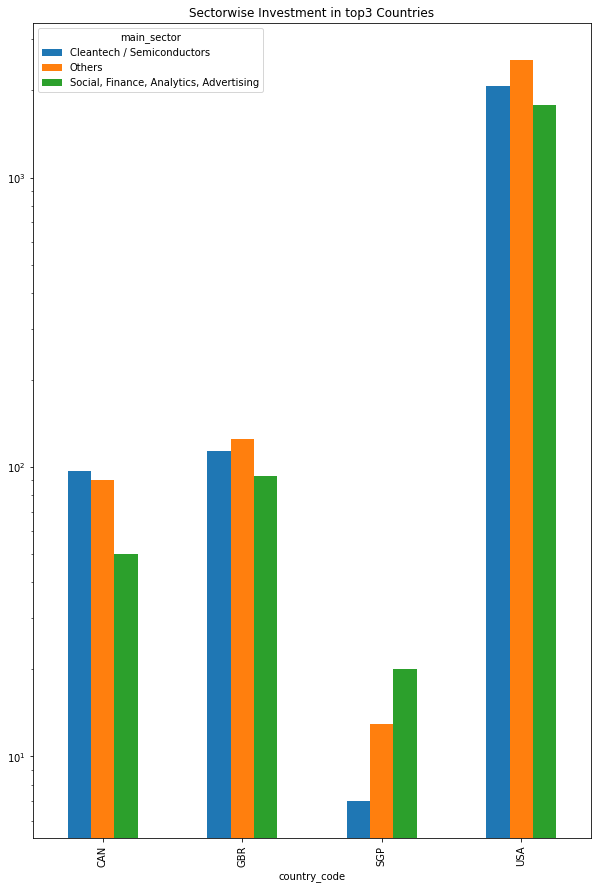

In [107]:
# Ploting the number of investments in the top 3 sectors of the top 3 countries on one chart 
ax = top_sectorwise_table.plot.bar(figsize=(10, 15),logy=True)
title = 'Sectorwise Investment in top3 Countries'
plt.title(title)
plt.show()

### Checkpoint 6: Plots



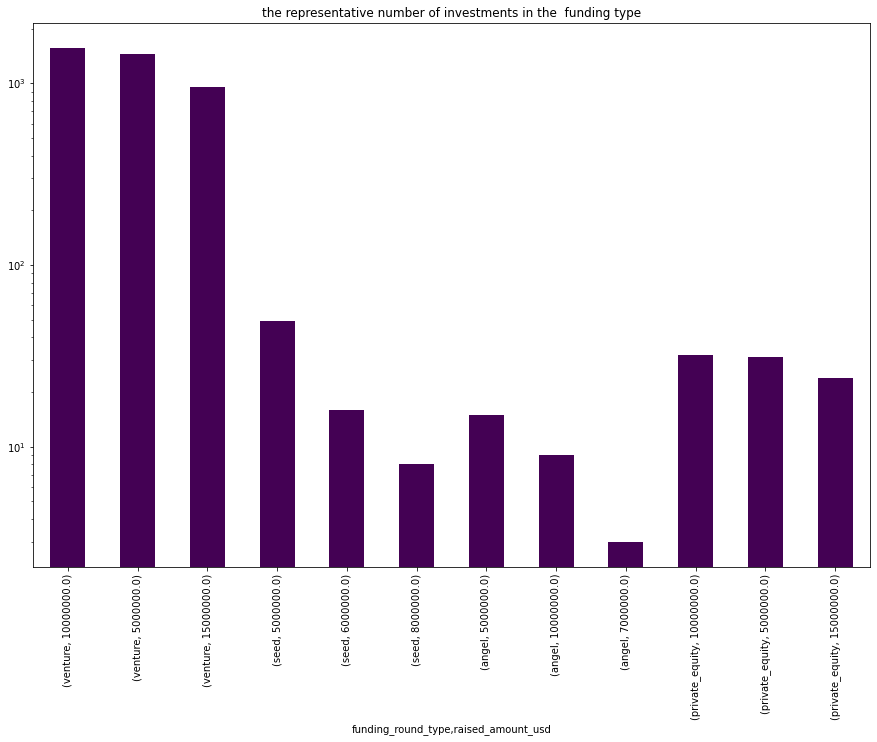

In [108]:
# Ploting the representative number of investments in the  funding type

cmap = cm.get_cmap('viridis') 
ax = rep_amount_in_FT.plot.bar(figsize=(15, 10),logy=True , colormap =cmap)
title = 'the representative number of investments in the  funding type'
plt.title(title)
plt.show()

#### Ploting the top 9 countries against the total amount of investments of funding type "Venture"

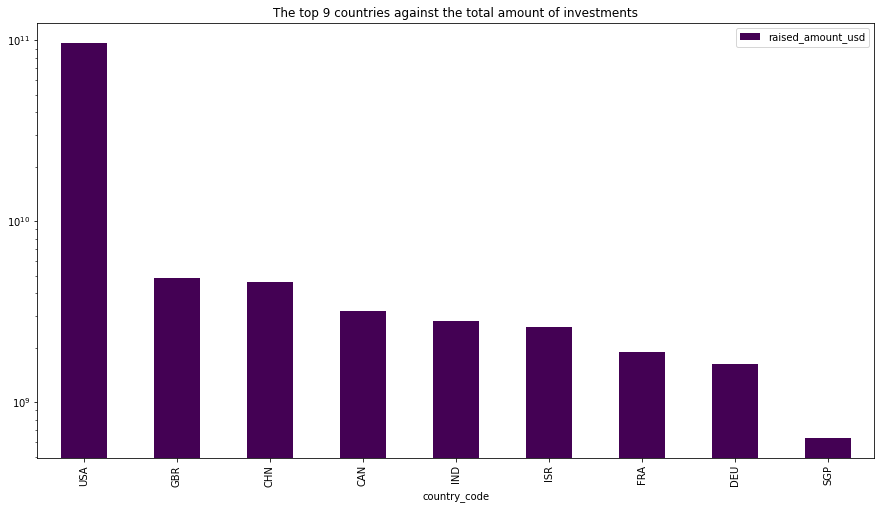

In [109]:
#Ploting the top 9 countries against the total amount of investments of funding type "Venture" with log scale to see the difference clearly
title ='The top 9 countries against the total amount of investments'
cmap = cm.get_cmap('viridis') 
country_table_sorted.plot(x='country_code', y='raised_amount_usd', kind='bar',logy=True, colormap=cmap, figsize=(15,8))
plt.title(title)
plt.show()

#### Ploting the number of investments in the top 3 sectors of the top 3 countries on one chart 

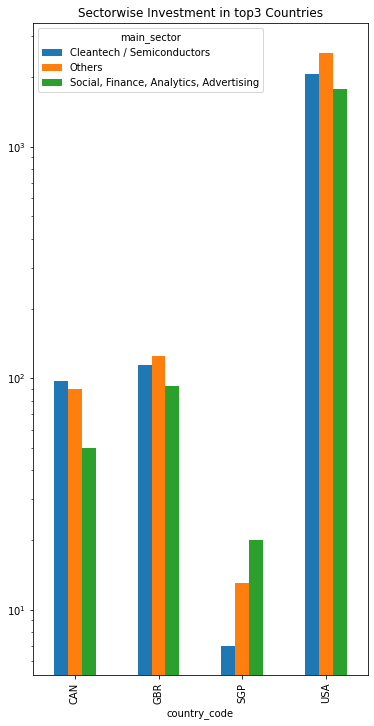

In [110]:
# Ploting the number of investments in the top 3 sectors of the top 3 countries on one chart 
ax = top_sectorwise_table.plot.bar(figsize=(6, 12),logy=True)
title = 'Sectorwise Investment in top3 Countries'
plt.title(title)
    
plt.show()